# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [11]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from VoterModel import VoterModel
from graphs import *
from vm_change import *

In [31]:
N = 10
er = erdos_renyi(N, 0.5)
#er = complete_graph(N)
#er = cycle(N)
#er = torus_2d(5,2)

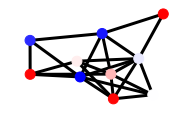

In [32]:
options = {
    'node_color': np.random.rand(N),
    'node_size': 100,
    'width': 3,
    'cmap': 'bwr'
}
plt.subplot(221)
nx.draw(er, **options)

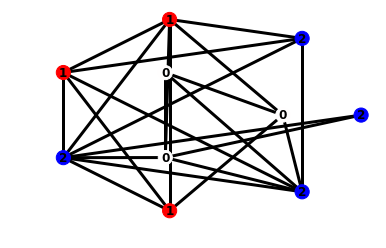

In [33]:
# vm = VoterModel(graph = er, voting='simple', visualization='shell')
# vm = VoterModel(graph = er, voting='probability', visualization='shell')
vm = VoterModel(graph=er, voting='weighted_prob', visualization='shell',
                handicap_b1=1.0, handicap_b2=0.0)
vm.initialize('all_rand')
vm.draw()

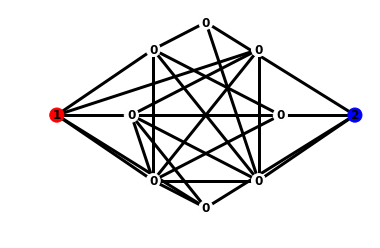

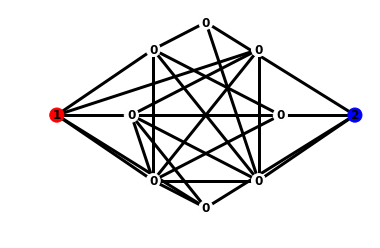

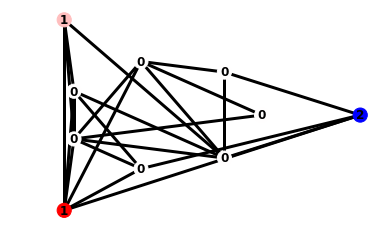

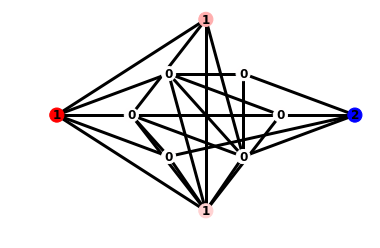

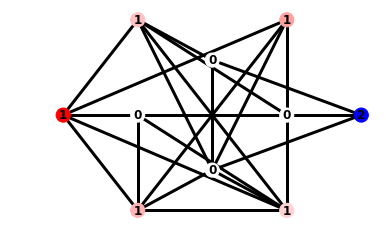

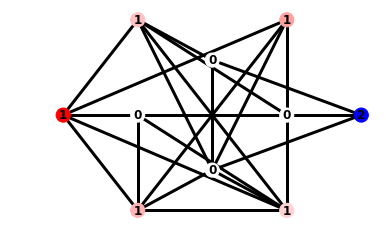

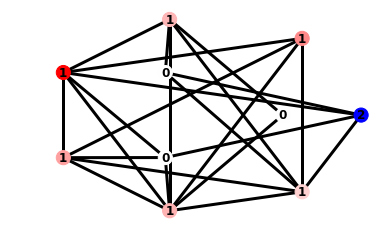

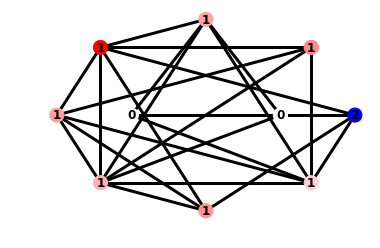

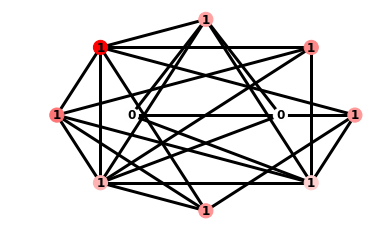

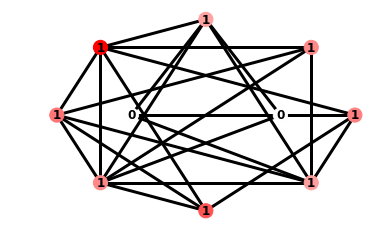

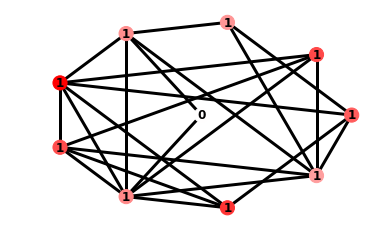

In [34]:
vm.initialize('rand_pair')
flux_arr = []
belief_arr = []

vm.draw()
plt.show()
for i in range(10):
    cb, ub = vm.update()
    flux_arr, belief_arr = track_changes(cb, ub, flux_arr, belief_arr)
    vm.draw()
    plt.show()

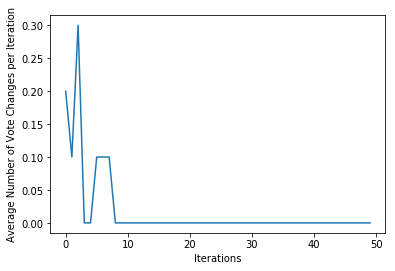

In [41]:
# Plot the average number of belief changes per iteration
plot_flux(flux_arr)

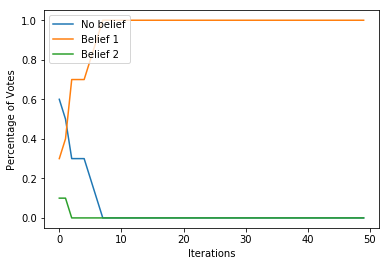

In [42]:
# Plot the distribution of beliefs per iteration
plot_comparisons(belief_arr)

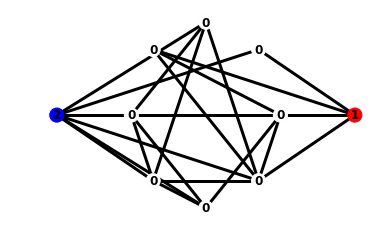

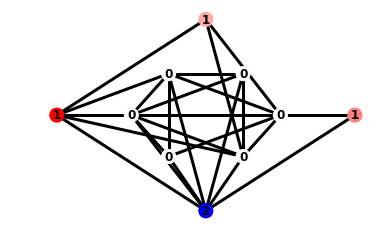

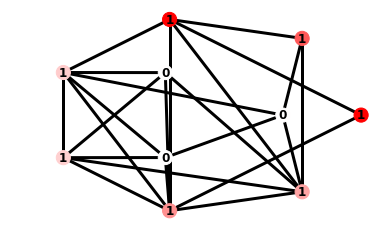

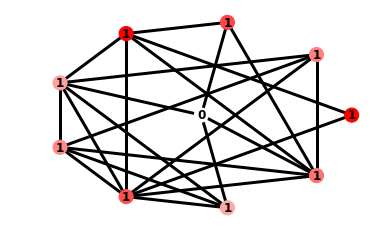

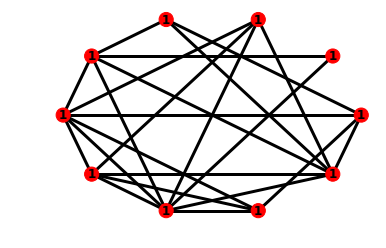

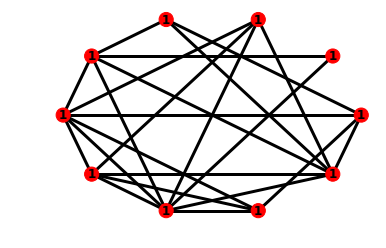

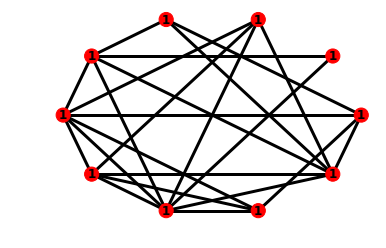

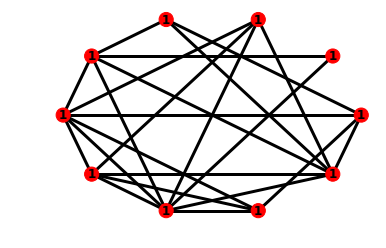

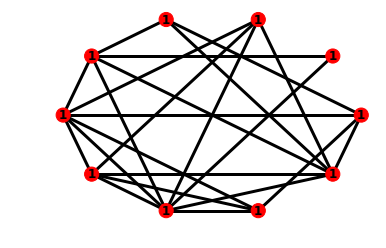

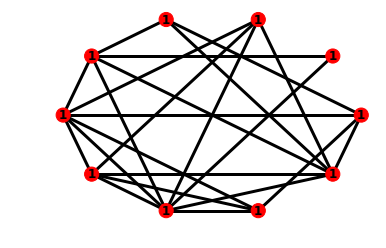

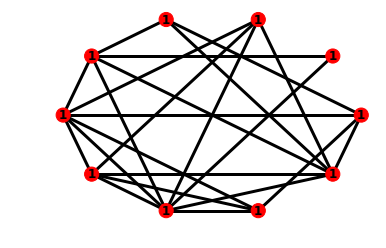

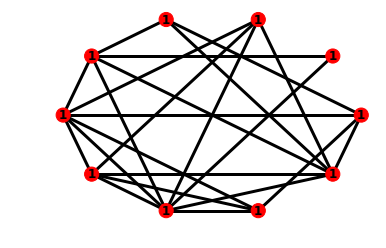

In [43]:
vm.initialize('rand_pair')
flux_arr = []
belief_arr = []

vm.draw()
plt.show()
for i in range(50):
    cb, ub = vm.update()
    flux_arr, belief_arr = track_changes(cb, ub, flux_arr, belief_arr)
    if i % 5 == 0:
        vm.draw()
        plt.show()
vm.draw()
plt.show()

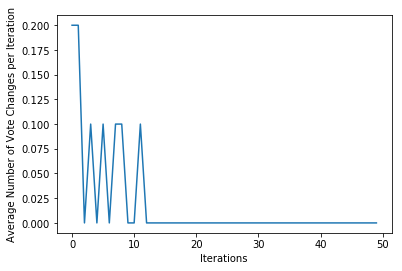

In [44]:
# Plot the average number of belief changes per iteration
plot_flux(flux_arr)

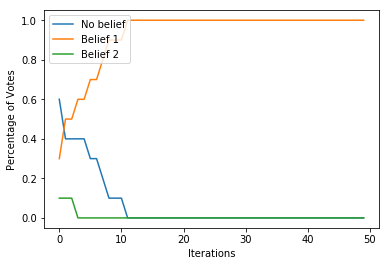

In [45]:
# Plot the distribution of beliefs per iteration
plot_comparisons(belief_arr)